In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor 

In [2]:
import matplotlib.pyplot as plt

# Getting Datasets

In [3]:
train_data = datasets.FashionMNIST(
    root='data',
    train = True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
data, label = train_data[1]
data, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

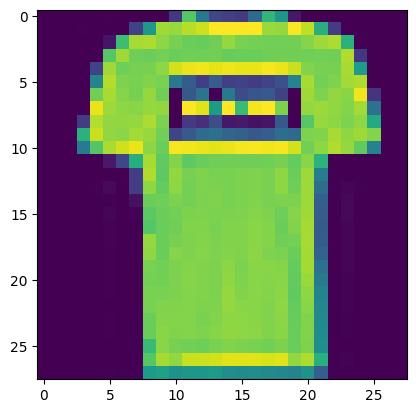

In [7]:
plt.imshow(data.squeeze())

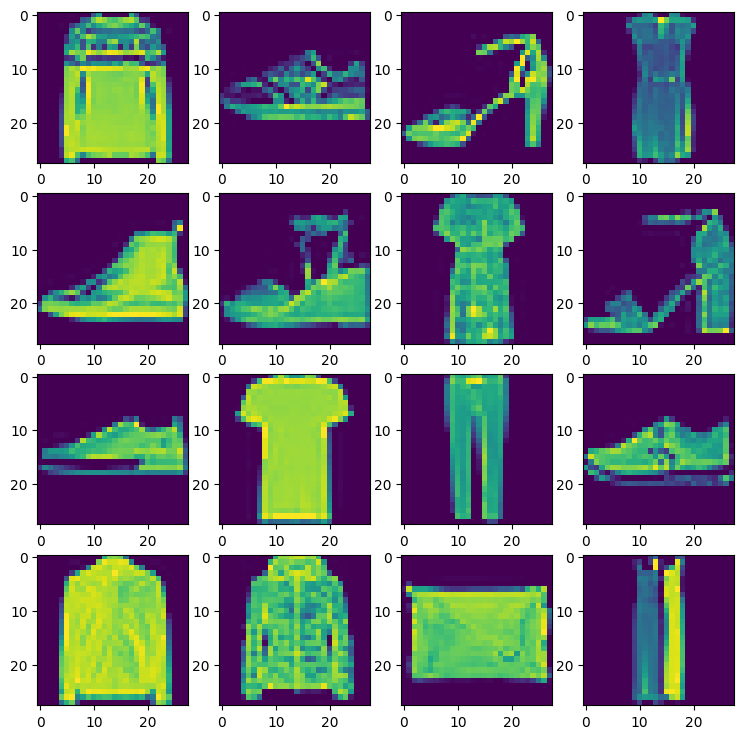

In [8]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())

In [9]:
from torch.utils.data import DataLoader

In [10]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2d50fdb2150>,
 <torch.utils.data.dataloader.DataLoader at 0x2d511ac2de0>)

In [11]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Model Version 1

In [12]:
class Model1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
            
        )
    def forward(self,x):
        return self.layer_stack(x)

In [13]:
model1 = Model1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model1

Model1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [16]:
from tqdm.auto import tqdm

C:\python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Training Model 1

In [17]:
# epochs = 3
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}")
#     train_loss = 0
#     for batch, (X,y) in enumerate(train_dataloader):
#         model1.train()
#         y_pred = model1(X)
#         loss = loss_fn(y_pred,y)
#         train_loss += loss
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         if batch % 400 == 0:
#             print(f"Looked At: {batch} / {len(train_dataloader.dataset)} samples.")

#     train_loss /= len(train_dataloader)

In [18]:
# print(train_loss)

In [19]:
# for epoch in tqdm(range(epochs)):
#     test_loss, test_acc = 0,0
#     model1.eval()
#     with torch.inference_mode():
#         for X, y in test_dataloader:
#             test_pred = model1(X)
#             test_loss += loss_fn(test_pred, y)
#             test_acc += accuracy(y_true = y, y_pred=test_pred.argmax(dim=1))
#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)
#     print(f"\nTrain Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")
    

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Model 2 (Non Linear Model)

In [21]:
class Model2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [22]:
model2 = Model2(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device)
model2
next(model2.parameters()).device

device(type='cuda', index=0)

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr = 0.1)

In [34]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):
    train_loss, train_acc = 0,0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        y_pred = model(X)
        loss =  loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.5f}%")

In [25]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}%\n")

In [26]:
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(data_loader=train_dataloader,
              model=model2,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy)
    test_step(data_loader=test_dataloader,
             model=model2,
             loss_fn=loss_fn,
             accuracy_fn=accuracy)


torch.manual_seed(42)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.00000 | Train Accuracy: 51.06833%


 33%|████████████████████████████                                                        | 1/3 [00:14<00:29, 14.77s/it]

Test Loss: 1.05773 | Test Accuracy: 61.26198%

Epoch: 1
Train Loss: 0.00000 | Train Accuracy: 61.85500%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:29<00:14, 14.83s/it]

Test Loss: 1.00942 | Test Accuracy: 61.90096%

Epoch: 2
Train Loss: 0.00000 | Train Accuracy: 67.91000%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:44<00:00, 14.88s/it]

Test Loss: 0.87421 | Test Accuracy: 69.96805%



# CNN Model

In [29]:
class Model3(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x
        

In [30]:
model3 = Model3(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model3

Model3(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model3.parameters(), lr=0.1)

In [35]:
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
              model=model3,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy)
    test_step(data_loader=test_dataloader,
             model=model3,
             loss_fn=loss_fn,
             accuracy_fn=accuracy)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.26142 | Train Accuracy: 90.61833%


 33%|████████████████████████████                                                        | 1/3 [00:17<00:35, 17.63s/it]

Test Loss: 0.30453 | Test Accuracy: 88.72804%

Epoch: 1
---------
Train Loss: 0.25420 | Train Accuracy: 90.79000%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:34<00:17, 17.36s/it]

Test Loss: 0.28828 | Test Accuracy: 89.45687%

Epoch: 2
---------
Train Loss: 0.24903 | Train Accuracy: 90.96333%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:51<00:00, 17.30s/it]

Test Loss: 0.28248 | Test Accuracy: 89.75639%



In [36]:
from pathlib import Path

In [37]:
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name = 'FashionMNIST_Classifier.pt'
model_save = model_path / model_name

print(model_save)
torch.save(obj=model3.state_dict(), f=model_save)

models\FashionMNIST_Classifier.pt
